# TUGAS 4

In [ ]:
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import nltk
import re
import joblib

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Feb11F/dataset/main/beritabanten%20(1).csv')
df

,Judul,Isi,Kategori
0,"Gelapkan dan Jual Kembali Mobil Kredit, Ibu Mu...","LEBAK– Seorang ibu muda, AK (29), asal Kabupat...",hukum
1,Suami di Bogor Aniaya Istri Hingga Tewas Gara-...,BOGOR– Seorang suami bernama Adi Pratama warga...,hukum
2,Satpol PP Cilegon Segera Tertibkan Alat Peraga...,"CILEGON– Menjelang pemilu serentak 2024, hampi...",Politik
3,KPU Lebak Bantah Isu PPK Titipan,LEBAK– Ketua Komisi Pemilihan Umum (KPU) Kabup...,Politik
4,Satgas Antimafia Bola Polri Kembali Tetapkan 2...,SERANG– Satuan Tugas Antimafia Bola Polri kemb...,hukum
...,...,...,...
295,Ini Alasan Raffi Ahmad Beli Cilegon United,CILEGON– Artis Raffi Ahmad mengungkap alasanny...,Sport
296,"Ramai Dibahas, Helldy-Ati Marliati Berpotensi ...",CILEGON– Meski musim Pemilihan Kepala Daerah (...,Politik
297,Klub Liga 1 Sulit Bertahan Jika Kompetisi Belu...,JAKARTA– Klub-klub Liga 1 mulai berteriak akan...,Sport
298,IMALA Tuding KPU Lebak Lakukan Pungli Kepada A...,LEBAK– Diduga adanya pungutan liar (Pungli) ho...,Politik


In [ ]:
df = df.dropna()
df.isnull().sum()

Judul       0
Isi         0
Kategori    0
dtype: int64

In [ ]:
def cleaning(text):
  text = re.sub(r'[^\w\s.?!,]', '', text).strip()
  return text

df['Cleaning'] = df['Isi'].apply(cleaning)
df['Cleaning']

0      LEBAK Seorang ibu muda, AK 29, asal Kabupaten ...
1      BOGOR Seorang suami bernama Adi Pratama warga ...
2      CILEGON Menjelang pemilu serentak 2024, hampir...
3      LEBAK Ketua Komisi Pemilihan Umum KPU Kabupate...
4      SERANG Satuan Tugas Antimafia Bola Polri kemba...
                             ...                        
295    CILEGON Artis Raffi Ahmad mengungkap alasannya...
296    CILEGON Meski musim Pemilihan Kepala Daerah Pi...
297    JAKARTA Klubklub Liga 1 mulai berteriak akan s...
298    LEBAK Diduga adanya pungutan liar Pungli honor...
299    PANDEGLANG Keluarga dan Kuasa Hukum korban kas...
Name: Cleaning, Length: 300, dtype: object

In [ ]:
def tokenizer(text):
  text = text.lower()
  return sent_tokenize(text)

df['Tokenizing'] = df['Cleaning'].apply(tokenizer)
df['Tokenizing']

0      [lebak seorang ibu muda, ak 29, asal kabupaten...
1      [bogor seorang suami bernama adi pratama warga...
2      [cilegon menjelang pemilu serentak 2024, hampi...
3      [lebak ketua komisi pemilihan umum kpu kabupat...
4      [serang satuan tugas antimafia bola polri kemb...
                             ...                        
295    [cilegon artis raffi ahmad mengungkap alasanny...
296    [cilegon meski musim pemilihan kepala daerah p...
297    [jakarta klubklub liga 1 mulai berteriak akan ...
298    [lebak diduga adanya pungutan liar pungli hono...
299    [pandeglang keluarga dan kuasa hukum korban ka...
Name: Tokenizing, Length: 300, dtype: object

In [ ]:
def graph_cosine_sim(x, threshold = 0.11):
  # TFIDF
  vectorizer = TfidfVectorizer()
  tfidf = vectorizer.fit_transform(x)
  cos_sim = cosine_similarity(tfidf)
  G = nx.Graph()

  # Mengisi nilai similarity antara kalimat ke dalam edges (Garis Penghubung)
  for i in range(len(x)):
    for j in range(i+1, len(x)):
      sim = cos_sim[i][j]
      if sim > threshold:
        G.add_edge(i, j, weight=sim)

  return G

In [ ]:
def plot_graph(G, figsize=(35, 30), node_size=700, node_color='skyblue'):
  # Menggambar graf dengan canvas yang diperbesar
  pos = nx.spring_layout(G)  # Menentukan posisi simpul
  labels = nx.get_edge_attributes(G, 'weight')

  # Menentukan ukuran canvas
  plt.figure(figsize=(35, 30))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
  plt.show()

In [ ]:
def summarization(x, k = 4, index=1, threshold=0.11, show_centrality=False):
  # Memasukkan Nilai Cosine Similirity ke dalam Graph
  G = graph_cosine_sim(x, threshold)

  # Menghitung nilai dari closeness centrality
  centrality = nx.closeness_centrality(G)
  if show_centrality:
    print(f"Nilai Closeness Centrality Dokumen Ke - {index} : {centrality}")

  # Menyusun Kalimat berdasarkan nilai Closeness Centrality tertinggi dan lebih dari treshold
  centrality = dict(sorted(centrality.items(), key=lambda item : item[1], reverse=True))

  summary_sentences = []
  for i, centr in enumerate(centrality.items()):
    if i < k:
      summary_sentences.append(x[centr[0]])

  return (' '.join(summary_sentences), G)

In [ ]:
summary, G = summarization(df["Tokenizing"].iloc[:1][0], k = 5, show_centrality=True, threshold=0.2)

Nilai Closeness Centrality Dokumen Ke - 1 : {}


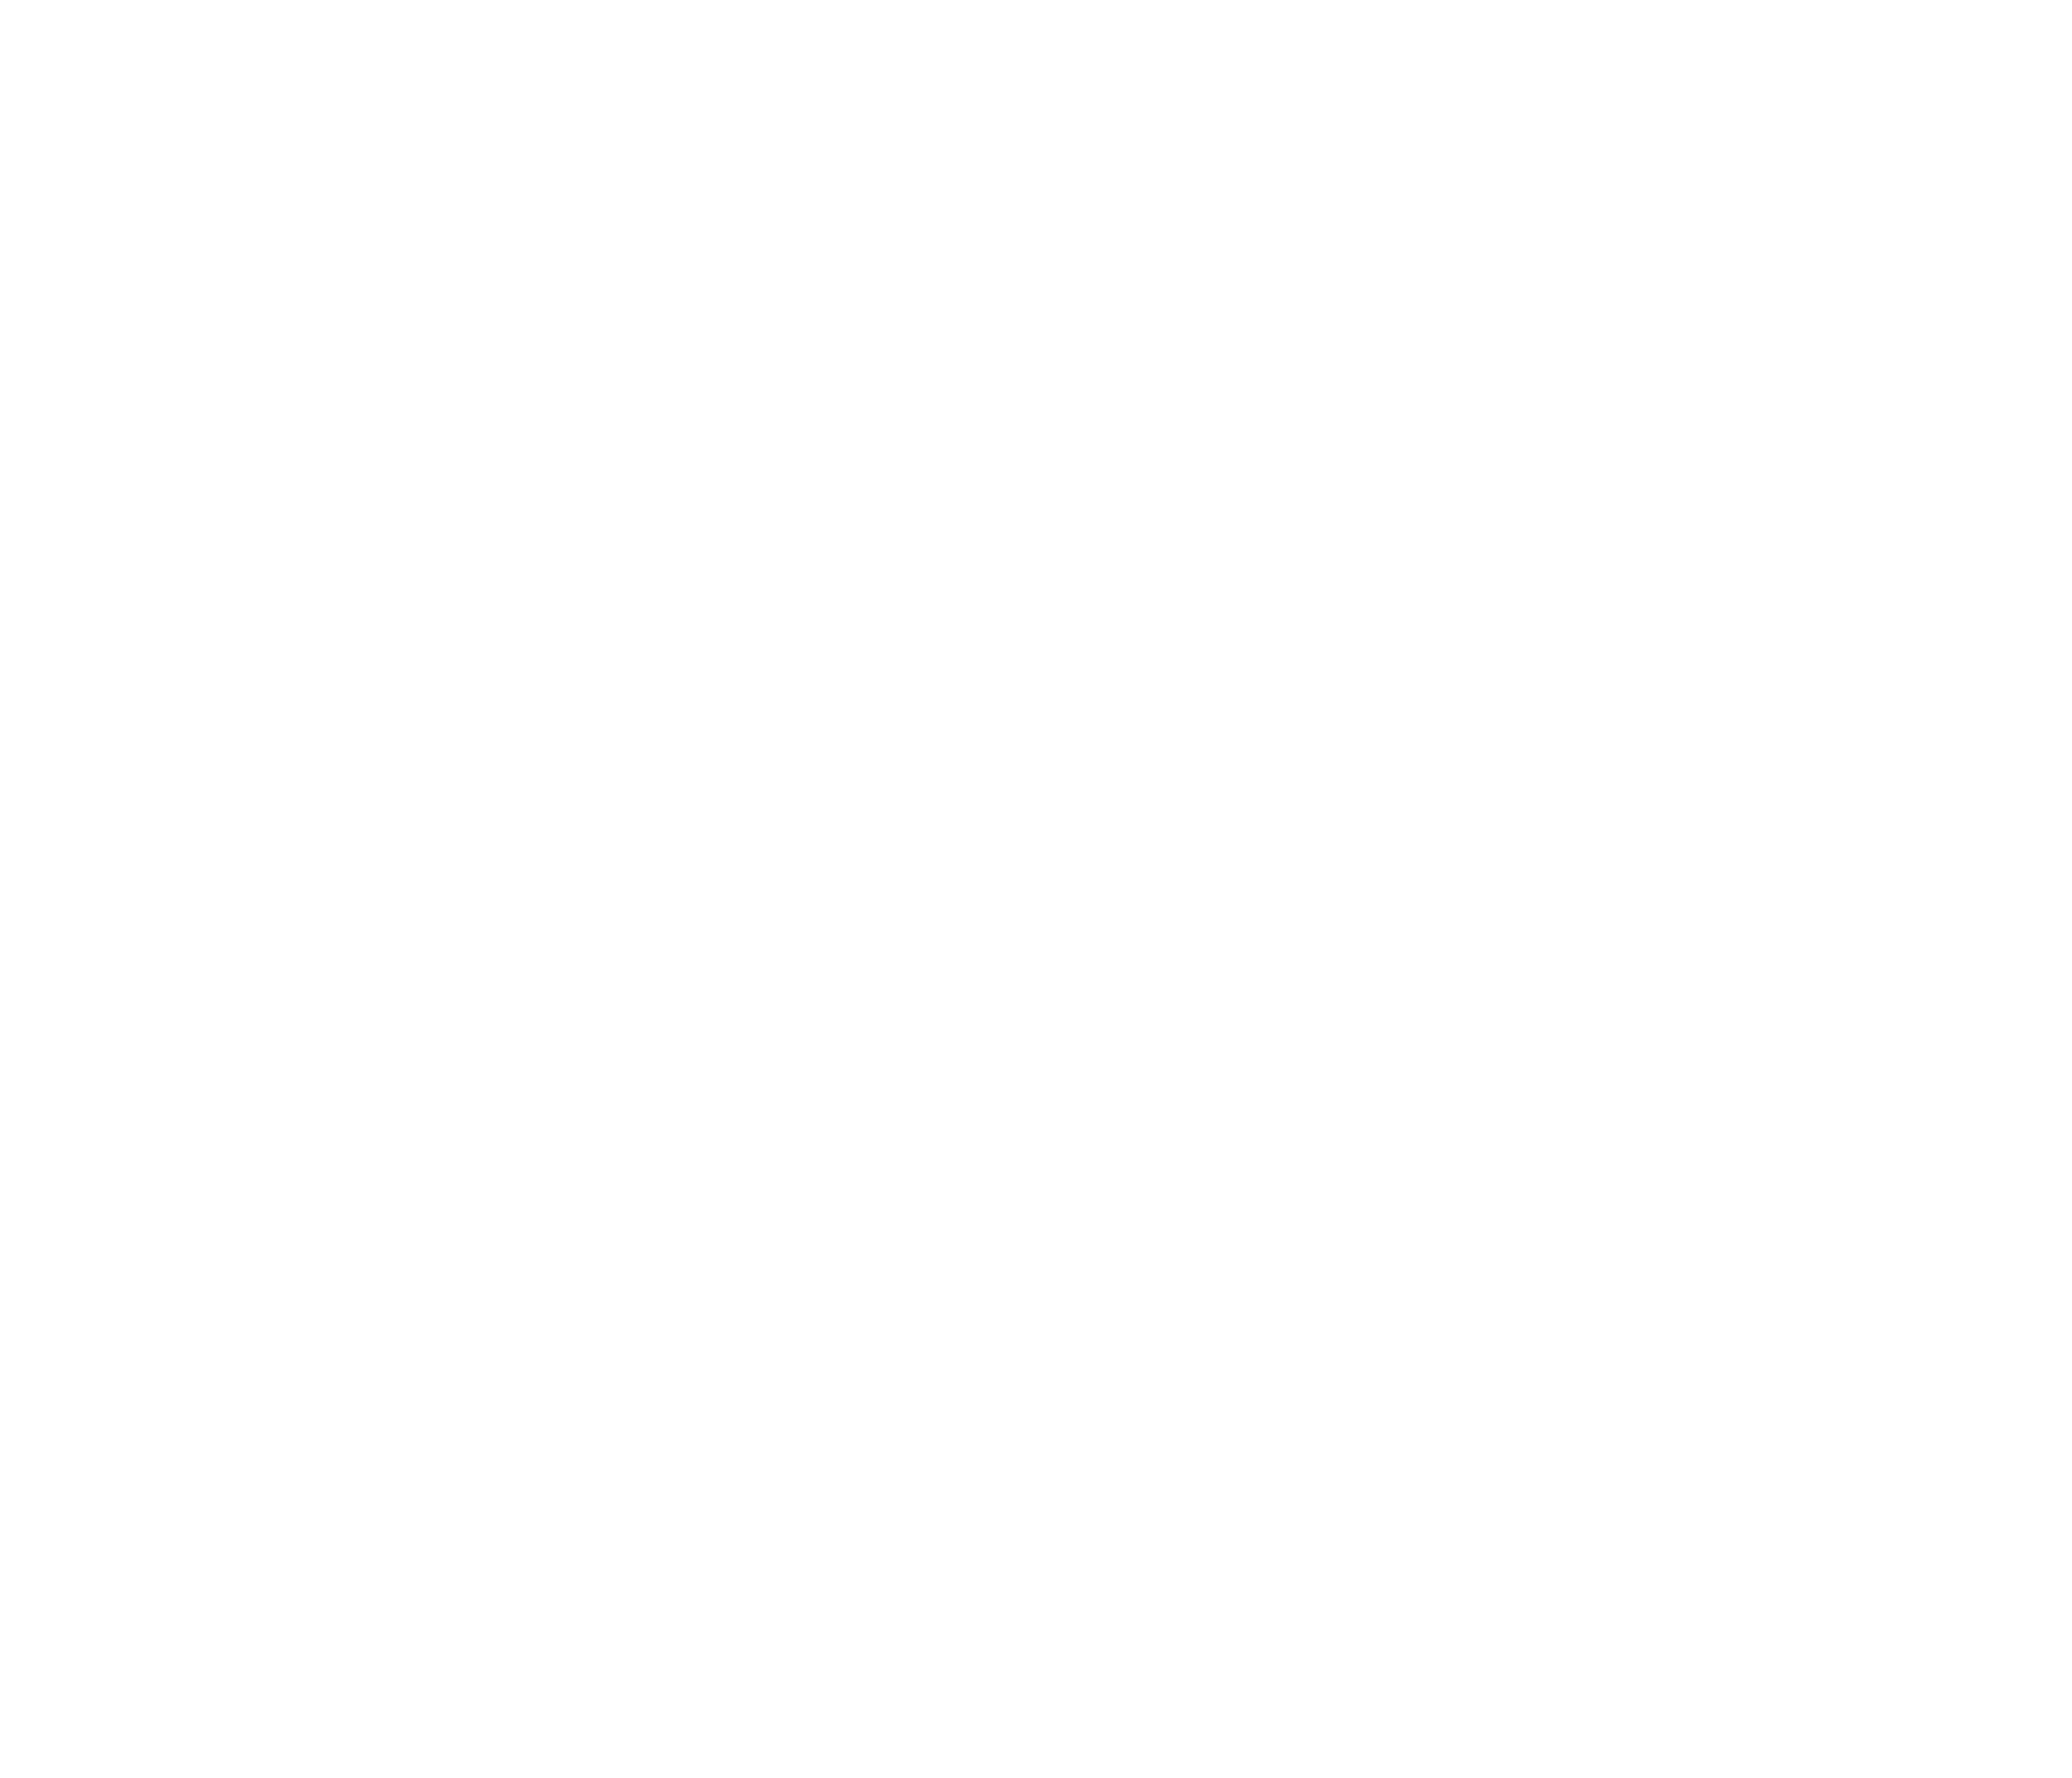

In [ ]:
plot_graph(G)

In [ ]:
df["Summary"] = df.apply(lambda row : summarization(row['Tokenizing'], index=row.name+1, k=7, show_centrality=True)[0], axis=1)

Nilai Closeness Centrality Dokumen Ke - 1 : {0: 0.5, 1: 0.8, 2: 0.6666666666666666, 3: 0.8, 4: 0.5}
Nilai Closeness Centrality Dokumen Ke - 2 : {0: 1.0, 1: 0.75, 2: 1.0, 3: 0.75}
Nilai Closeness Centrality Dokumen Ke - 3 : {0: 0.6470588235294118, 1: 0.6470588235294118, 3: 0.4583333333333333, 5: 0.4782608695652174, 7: 0.7333333333333333, 11: 0.6470588235294118, 4: 0.6470588235294118, 6: 0.5238095238095238, 10: 0.4782608695652174, 2: 0.4583333333333333, 9: 0.4782608695652174, 8: 0.4074074074074074}
Nilai Closeness Centrality Dokumen Ke - 4 : {0: 1.0, 1: 0.6666666666666666, 2: 0.6666666666666666}
Nilai Closeness Centrality Dokumen Ke - 5 : {0: 1.0, 1: 0.75, 2: 1.0, 3: 0.75}
Nilai Closeness Centrality Dokumen Ke - 6 : {0: 0.6363636363636364, 3: 0.6363636363636364, 4: 0.6363636363636364, 6: 0.5384615384615384, 1: 0.4375, 2: 0.4375, 5: 0.5384615384615384, 7: 0.4117647058823529}
Nilai Closeness Centrality Dokumen Ke - 7 : {0: 1.0, 1: 0.6666666666666666, 2: 0.6666666666666666}
Nilai Closeness 

In [ ]:
new_df = df[["Summary", "Kategori"]]
new_df

,Summary,Kategori
0,ia diamankan lantaran telah menggelapkan mobil...,hukum
1,bogor seorang suami bernama adi pratama warga ...,hukum
2,"kalau ada pelanggaran, seperti apa juga sanksi...",Politik
3,lebak ketua komisi pemilihan umum kpu kabupate...,Politik
4,serang satuan tugas antimafia bola polri kemba...,hukum
...,...,...
295,"berkat profesi sebagai artis, dia bisa mewujud...",Sport
296,cilegon meski musim pemilihan kepala daerah pi...,Politik
297,semua tim sepertinya juga akan merasakan hal y...,Sport
298,padahal dalam aturan keputusan kpu nomor 53 pe...,Politik


In [ ]:
new_df.to_csv('Data Berita Hasil Ringkasan.csv')

In [ ]:
df["Summary"][0]

'ia diamankan lantaran telah menggelapkan mobil kreditan dan menjualnya kembali kepada orang lain.kasubdit ii ditreskrimsus polda banten kompol dp ambarita mengatakan, penangkapan ak berdasarkan laporan yang dibuat oleh pt mitra pinasthika mustika finance indonesia cabang cilegon selaku pihak leasing.ak menggelapkan mobil kreditan berplat nomor a 8904 kg jenis suzuki futura 1.5 kepada orang lain tanpa sepengetahuan. dalam catatan perusahaan, ak baru membayar cicilan sebanyak 15 kali dari 48 kali.semenjak mobil tersebut dipindah\xa0tangankan, tersangka tidak melakukan angsuran pembayaran unit tersebut, ungkapnya.pihak leasing, kata ambarita, telah meminta ak untuk mengembalikan mobil kreditan tersebut namun tersangka tidak bisa menunjukkannya. kendaraan itu dijualnya pada oktober 2020 lalu.tanpa adanya ijin tertulis dari pihak kreditur pt mpm finance, tersangka menjual mobilnya, jelasnya, senin 3172023.ambarita mengungkapkan, menurut keterangan pihak leasing, ak tidak pernah membayar ke

In [ ]:
vectorizer_summary = TfidfVectorizer()
X_summary = vectorizer_summary.fit_transform(df["Summary"]).toarray()
y = df["Kategori"]

In [ ]:
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(X_summary, y, test_size=0.3, random_state=42)

In [ ]:
# Inisialisasi model Naive Bayes Gaussian
gnb_summary = GaussianNB()

# Melatih model menggunakan data latih
gnb_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_gnb_summary = gnb_summary.predict(X_test_summary)

In [ ]:
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_gnb_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 0.9222222222222223


In [ ]:
report = classification_report(y_test_summary, y_pred_gnb_summary)
print(f'Report Klasifikasi:\n{report}')

Report Klasifikasi:
              precision    recall  f1-score   support

     Politik       0.89      0.96      0.93        26
       Sport       0.97      0.94      0.96        35
       hukum       0.89      0.86      0.88        29

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



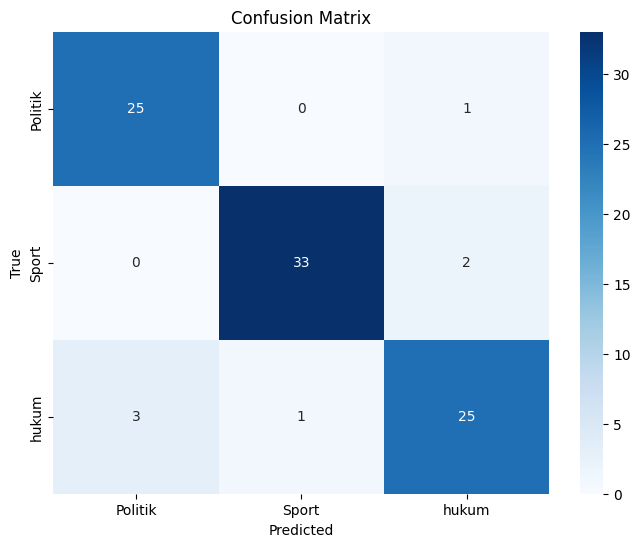

In [ ]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gnb_summary.classes_, yticklabels=gnb_summary.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test_summary, y_pred_gnb_summary)
plot_confusion_matrix(cm)

In [ ]:
new_data = ["SERANG – Prajurit Grup 1 Kopassus kembali menorehkan prestasi dalam bidang Lomba Lari pada CT Arsa Charity Fun Run 2023 di BSD Tanggerang dan Kota Wisata Run 2023 di Malang. Pada even tersebut yang digelar Sabtu, 18 November 2023 prajurit Grup 1 Kopassus menorehkan 2 prestasi pada even Lari Kategori 10 K. Praka Gunawan berhasil mendatkan Juara 3 dengan waktu 33’50. Sedangakan Sertu Amat Sucipto Parapat mendapatkan Juara 4 dengan waktu 33’51. Berbeda dengan 2 Prajurit Grup 1 Kopassus lainnya yang juga mengukir prestasi dalam Lomba Lari Kota Wisata Run 2023 di Malang hari Minggu, 19 November 2023. Prajurit Grup 1 Kopassus dapat menorehkan prestasi puncak pada even Lari Kategori 10 K. Sertu Amat Sucipto Parapat mendapatkan juara 1 dengan waktu 33’33” dan Amirudin mendapatkan Juara 3 dengan waktu 35’20”. Prestasi tersebut tentunya tidak terlepas dari arahan dan program yang diberikan oleh Komandan Grup 1 Kopassus, Kolonel Inf Irfan Amir. Prestasi ini tentunya sebagai motivasi untuk terus memberikan hasil yang terbaik dalam setiap even perlombaan yang dilaksanakan."]
new_data_summary, G = summarization(tokenizer(new_data[0]), k=5)
new_data_summary

'pada even tersebut yang digelar sabtu, 18 november 2023 prajurit grup 1 kopassus menorehkan 2 prestasi pada even lari kategori 10 k. praka gunawan berhasil mendatkan juara 3 dengan waktu 33’50. berbeda dengan 2 prajurit grup 1 kopassus lainnya yang juga mengukir prestasi dalam lomba lari kota wisata run 2023 di malang hari minggu, 19 november 2023. prajurit grup 1 kopassus dapat menorehkan prestasi puncak pada even lari kategori 10 k. sertu amat sucipto parapat mendapatkan juara 1 dengan waktu 33’33” dan amirudin mendapatkan juara 3 dengan waktu 35’20”. serang – prajurit grup 1 kopassus kembali menorehkan prestasi dalam bidang lomba lari pada ct arsa charity fun run 2023 di bsd tanggerang dan kota wisata run 2023 di malang. sedangakan sertu amat sucipto parapat mendapatkan juara 4 dengan waktu 33’51. prestasi tersebut tentunya tidak terlepas dari arahan dan program yang diberikan oleh komandan grup 1 kopassus, kolonel inf irfan amir.'

In [ ]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary]).toarray()
tfidf_Xnew_summary

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pred_gnb_summary = gnb_summary.predict(tfidf_Xnew_summary)
pred_gnb_summary[0]

'Sport'

In [ ]:
joblib.dump(gnb_summary, 'modelNB.pkl')

['modelNB.pkl']